# Linear Models. Базовые принципы машинного обучения


original sources - 
    * https://github.com/mephistopheies/mlworkshop39_042017/blob/master/1_ml_intro/ipy/lecture.ipynb
    * https://habrahabr.ru/company/ods/blog/322076/
    * https://habrahabr.ru/company/ods/blog/323890/


# Машинное обучение

![mlvd](https://github.com/mephistopheies/mlworkshop39_042017/raw/a6426fd652faa38864c3ea4538e000539106fb56/1_ml_intro/ipy/images/Data_Science_VD.png)

![mlvd](https://github.com/mephistopheies/mlworkshop39_042017/raw/a6426fd652faa38864c3ea4538e000539106fb56/1_ml_intro/ipy/images/bengio.png)

* Машинное обучение — это подраздел искусственного интеллекта, в котором изучаются алгоритмы, способные обучаться без прямого программирования того, что нужно изучать.
* *Что значит обучается?*
    * Говорят, что программа обучается на опыте **E** относительно класса задач **T** в смысле меры качества **L**, если при решении задачи **T** качество, измеряемое мерой **L**, возрастает при демонстрации нового опыта **E**.

# Типы задач машинного обучения

## Основные задачи
* *Обучение с учителем* - задача вывода функции $f: X \rightarrow Y$ по заданному размеченному множеству данных; каждый пример является парой вектора признаков объекта и желаемого отклика на него $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$, например целевая переменная может быть:
    * категориальной - задача классификации;
    * непрерывной - задача регрессии;
    * порядковой - задача ранжирования.
        
* *Обучение без учителя* - задача вывода функции, описывающей внутреннюю структуру неразмеченных данных $D = \left\{ x_i \right\}_{i=1, \ldots, n}$
    * кластеризация - задача выявления скрытых групп внутри данных;
    * сжатие размерности - задача уменьшения количества признаков;
    * заполнения пропусков в матрице - задача рекомендаций;
    * частичное обучение - задача обучения с учителем, при условии неограниченного доступа к неразмеченным данным и крайне ограниченным набором размеченных.

* *Обучение с подкреплением* - задача обучения агента принимать оптимальные решения при взаимодействии с окружающей средой;
    * в отличие от обучения с учителем, агент может влиять не только на себя (изменение своих параметров), но и изменять окружение (набор данных не фиксирован, можно например ограбить караван).

## Другие задачи
* *Трансфер знаний* - применение модели обученное для решения одной задачи при решении другой задачи;
* *активное обучение* - задача построения оптимального дизайна эксперимента, когда есть доступ к размеченным и неразмеченным данным, и требуется решить другую задачу машинного обучения, потратив как можно меньше запросов к данным;
* *Онлайн обучение* - потоковое обучение моделей машинного обучения;
* *Мета-обучение* или *обучение обучению*.

# Предиктивная модель

*Предиктивная модель* - это параметрическое семейство функций (гипотез):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* где
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - множество параметров

# Алгоритм обучения

*Алгоритм обучения* - это отображение из множества данных в множество гипотез:

$$\large \mathcal{M}: X \times Y \rightarrow \mathcal{H}$$

Обычно выделяют два шага при решении задачи обучения с учителем:
1. Обучение, когда выбирается гипотеза: $\large h = \mathcal{M}\left(D\right)$
* Тестирование, когда для заданного примера $\large x$ вычисляется выход модели $\large \hat{y} = h\left(x\right)$

# Минимизация эмпирического риска
*Минимизация эмпирического риска* - это принцип в статистической теории обучения для решения широкого круга задач, включая обучение с учителем, в частности задачи классификации и регрессии.

Введем вещественнозначную функцию (функцию ошибки):
$$\large L: Y \times Y \rightarrow \mathbb{R}$$
с помощью которой будем измерять на сколько отличается прогноз $\large \hat {y}$ от истинного значения целевой переменной $\large y$.

Риском гипотезы $\large h$ будем называть ожидаемое значение функции ошибки по распределению примеров:
$$\large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$

К сожалению совместная плотность $\large P\left(x, y\right)$ неизвестна (иначе бы не было и задачи). Но мы можем вычислить аппроксимацию выражения выше как среднее значение функции стоимости по выборке (эмпирический риск):

$$\large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$

Согласно принципу мы должны выбрать ту гипотезу, которая минимизирует эмпирический риск:
$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$

Примеры функций ошибки:
* классификация: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* регрессия: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

# Обобщение

Главным недостатком принципа минимизации эмпирического риска является переобучение:

* мы говорим, что модель обладает *обобщающей способностью* если вероятность ошибки на тестовом множестве данных (такое множество примеров, которое не участвовало в обучении ни в каком виде) мала или прогнозируема;
* *переобучение* провляется в том, что модель показывает хорошие результаты на обучающем множестве и плохие на тестовом. Такие модели не обладают обобщающей способностью.

In [1]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# main library for plotting
import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 10

In [4]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

In [5]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

Shape of X is (25,)
Head of X is [1.3459476  1.40884235 1.42771078 1.48431605 1.57865817 1.62897397
 1.81136874 1.84281611 2.00005298 2.50321096]


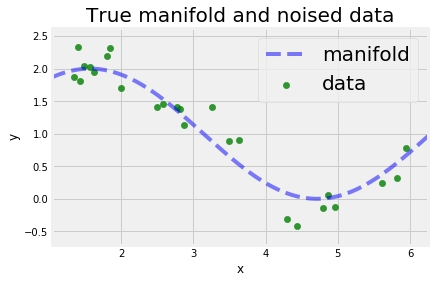

In [6]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Линейная регрессия

Ограничим пространство гипотез множеством линейных функций от аргумента размерности $\large \left(m + 1\right)$, смещение и один параметр на каждый признак ($\large x_0 = 1$):

$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
где:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Тогда эмпирический риск принимает вид среднеквадратичной ошибки:
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
где:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ это $\large n \times m + 1$ матрица, где каждая строка это вектор признаков.

In [7]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])

Top rows of X
[[1.         1.3459476 ]
 [1.         1.40884235]
 [1.         1.42771078]
 [1.         1.48431605]
 [1.         1.57865817]]


Выведем алгоритм обучения. Воспользуемся тем фактом, что функция стоимости в данном случае является выпуклой, это позволит нам найти глобальный оптимум:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Такое решение называется методом наименьших квадратов (МНК):
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

МНК решение обладает интересными свойствами, которые можно найти в теореме <a href="https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem">Гаусса-Маркова</a>.

In [8]:
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

In [9]:
print('Fitted params')
print(w)

Fitted params
[ 2.74501209 -0.50505038]


In [10]:
y_hat = np.dot(w, X.T)

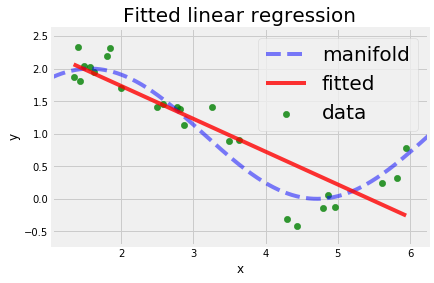

In [11]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
np.mean((data['y_train'] - y_hat)**2)

0.16695298030338435

# Полиномиальная регрессия

Расширим множество гипотез до множества всех полиномов степени $\large p$. Для количества признаков $\large m = 1$ множество гипотез будет:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

В остальном ничего не поменялось.

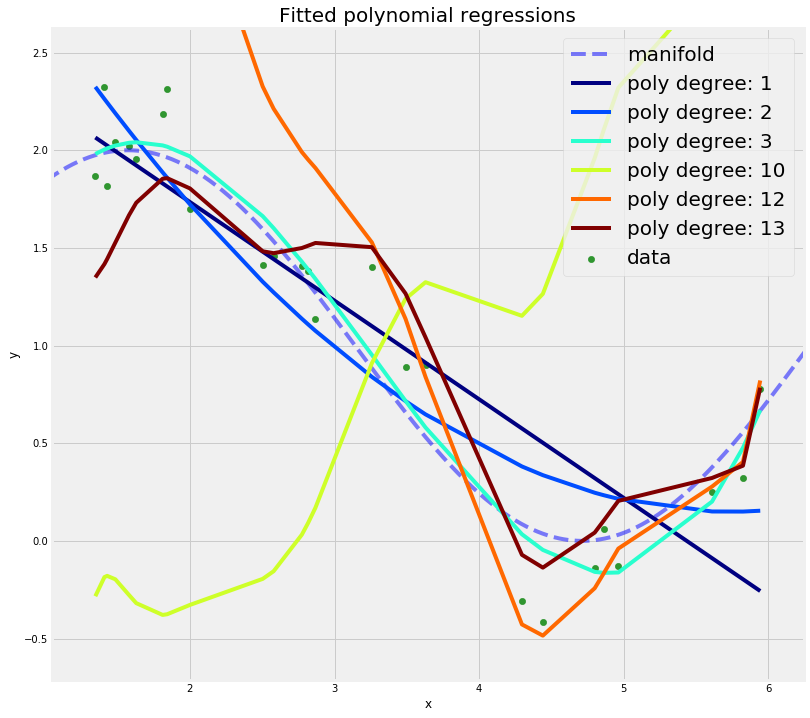

In [18]:
# define list with degrees of polynomials to investigate
plt.figure (figsize=(12,12))
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [19]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.16695298030338435
2 0.12413954469287805
3 0.04595783001221691
10 4.143401603088096
12 1.3788460629960022
13 0.10599072730319138


In [20]:
X.shape

(25, 14)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


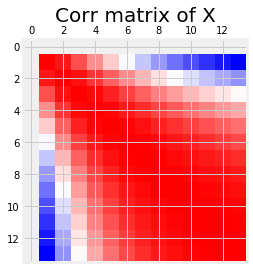

In [23]:
# Correlation matrix
plt.figure (figsize=(20,20))

plt.matshow(np.corrcoef(X.T), cmap=plt.cm.bwr)
plt.title('Corr matrix of X', fontsize=20)
plt.show()

In [24]:
# eigenvalues for poly-12 features, we can see multicollinearity
np.linalg.eigvals(np.cov(X[:, 1:-1].T))

array([ 2.62226739e+17,  8.13262532e+12,  2.82759078e+09,  2.15627658e+06,
        5.47606016e+03,  2.43098547e+01,  1.49974191e-01, -4.96187458e-02,
        2.11669027e-03,  4.26389956e-05,  5.66587587e-06,  1.01216446e-08])

In [25]:
# eigenvalues for poly-13 features, we can see multicollinearity and complex eigenvalues
np.linalg.eigvals(np.cov(X[:, 1:].T))

array([ 9.04216988e+18+0.j        ,  2.22287112e+14+0.j        ,
        7.30086239e+10+0.j        ,  3.61083632e+07+0.j        ,
        7.49618860e+04+0.j        ,  3.03768430e+02+0.j        ,
        1.98643371e+00+0.j        , -2.86790332e-02+0.04336908j,
       -2.86790332e-02-0.04336908j,  1.37742032e-02+0.j        ,
       -8.14416397e-06+0.j        , -3.59465984e-06+0.j        ,
        5.04070231e-06+0.j        ])

Для тестирование на линейную зависимость или мультиколлинеарность можно исползовать число обусловленности матрицы $X^T X$. Число обусловленности равно отношению большего собственного числа к меньшему. Большое число определенности или наличие близких к нулю собственных чисел является признаком мультиколлинеарности.

К сожалению инвертирование $X^T X$ при нечеткой мультиколлинеарности численно нестабильно, но существует решение. Вспомним, что любую полноранговую матрицу $X$ размера $n \times m$ можно представить в виде:
$$\Large X = QR$$
где
- $Q^T Q = E$
- $R$ треугольная матрица размера $m \times m$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(QR\right)^T \left(QR\right) \vec{w} = \left(QR\right)^T \vec{y} \\
&\Leftrightarrow& R^T \left(Q^T Q\right) R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& R^T R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& \left(R^T\right)^{-1} R^T R \vec{w} = \left(R^T\right)^{-1}  R^T Q^T \vec{y} \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(R\right)^{-1} Q^T \vec{y} \\
\end{array}$$

Треугольная матрица легко инвертируется, поэтому решение заметно стабильнее. Если бы нам был интересен только прогноз, то можно было бы и не выводить значения параметров модели:

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& Q R \vec{w} = Q Q^T \vec{y} \\
&\Leftrightarrow& X \vec{w} = Q Q^T \vec{y} \\
\end{array}$$

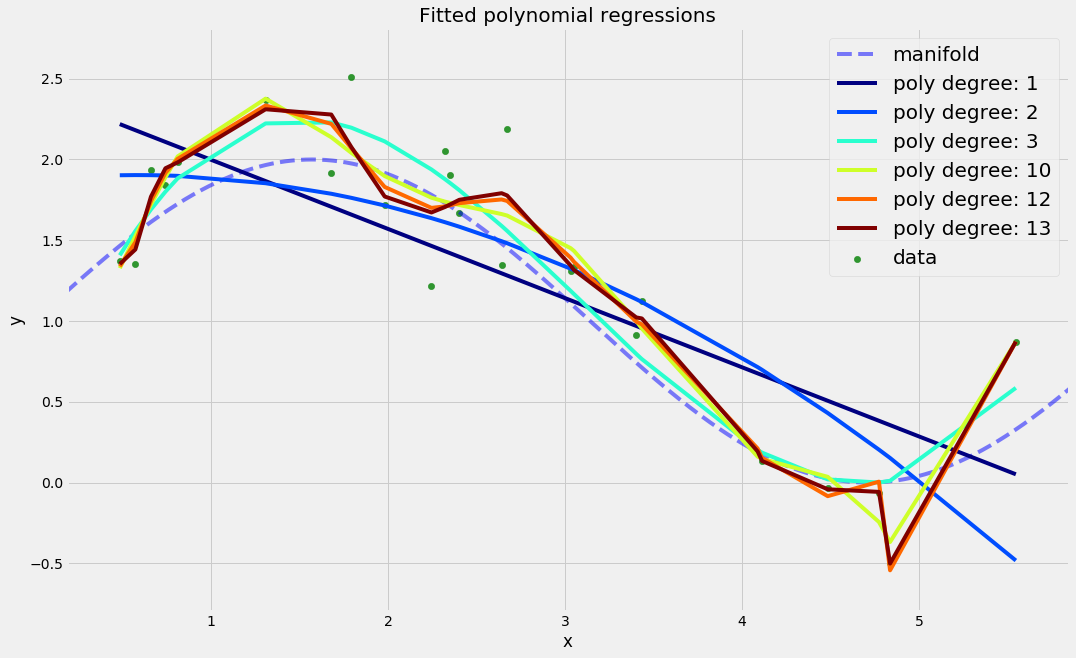

In [17]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [18]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.26704367617359787
2 0.22495097556913013
3 0.08217051592252772
10 0.05290620416899455
12 0.04662076408694629
13 0.04538684622701192


Посмотрим на значение параметров, которые получились в результате применения алгоритма обучения:

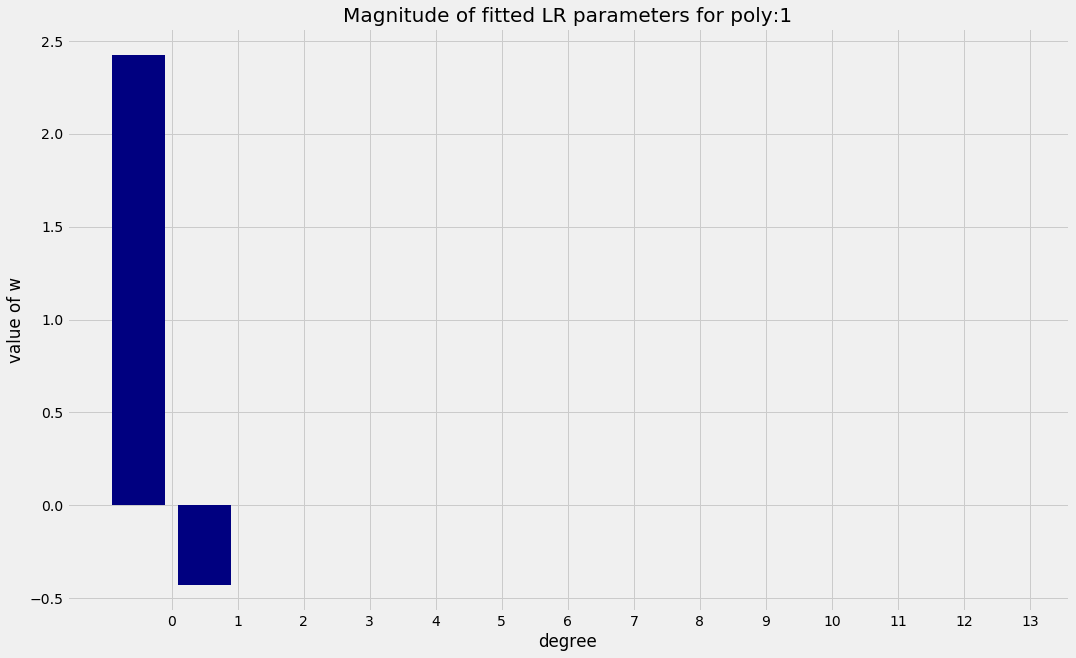

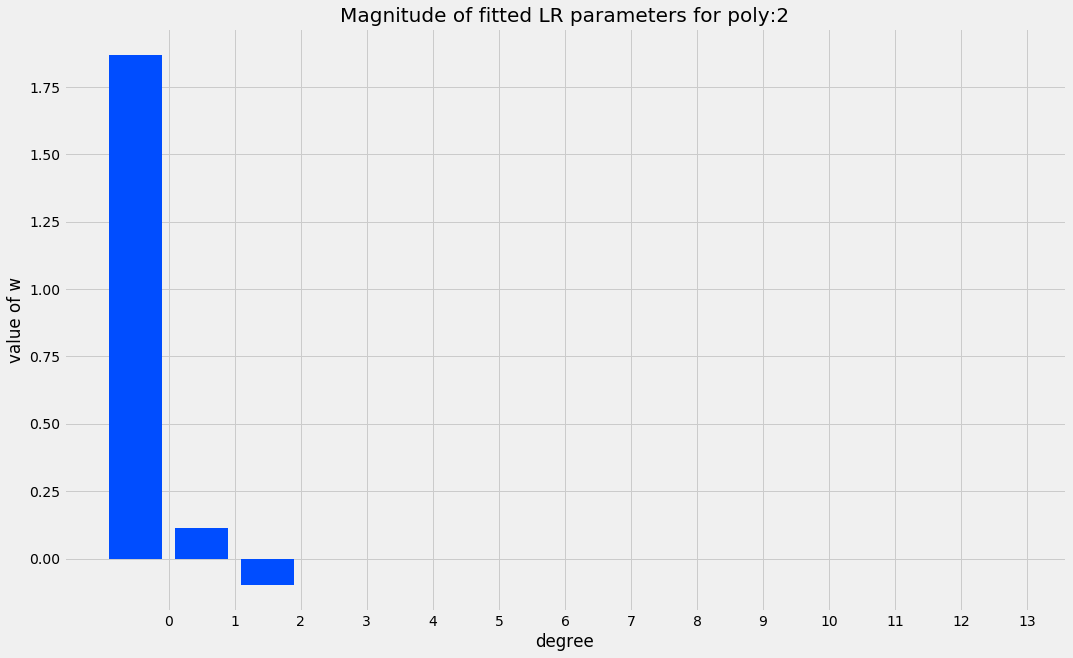

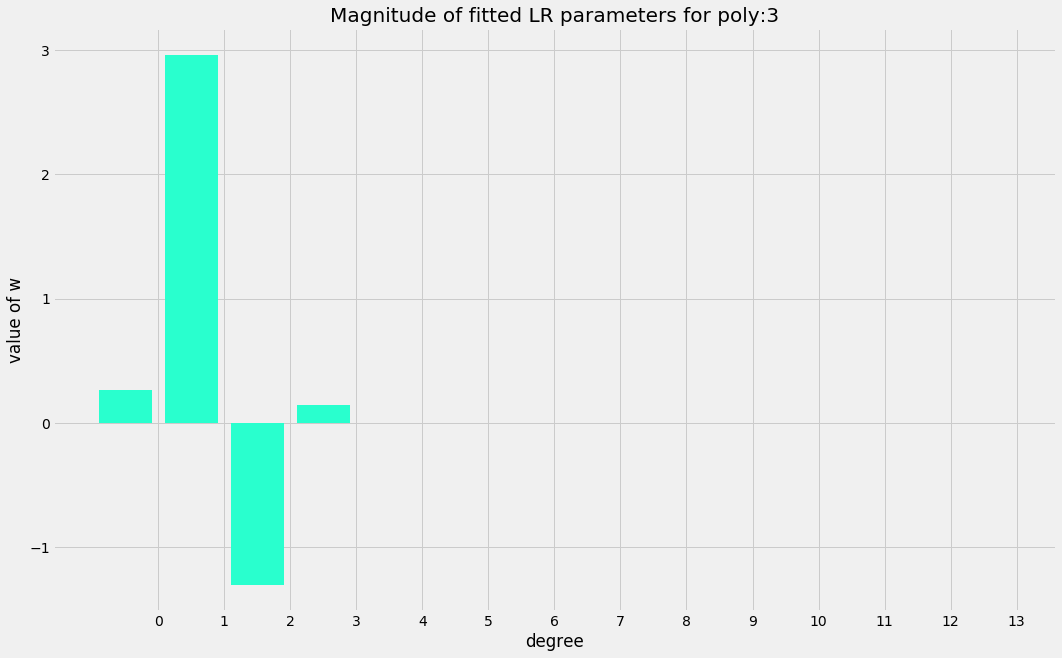

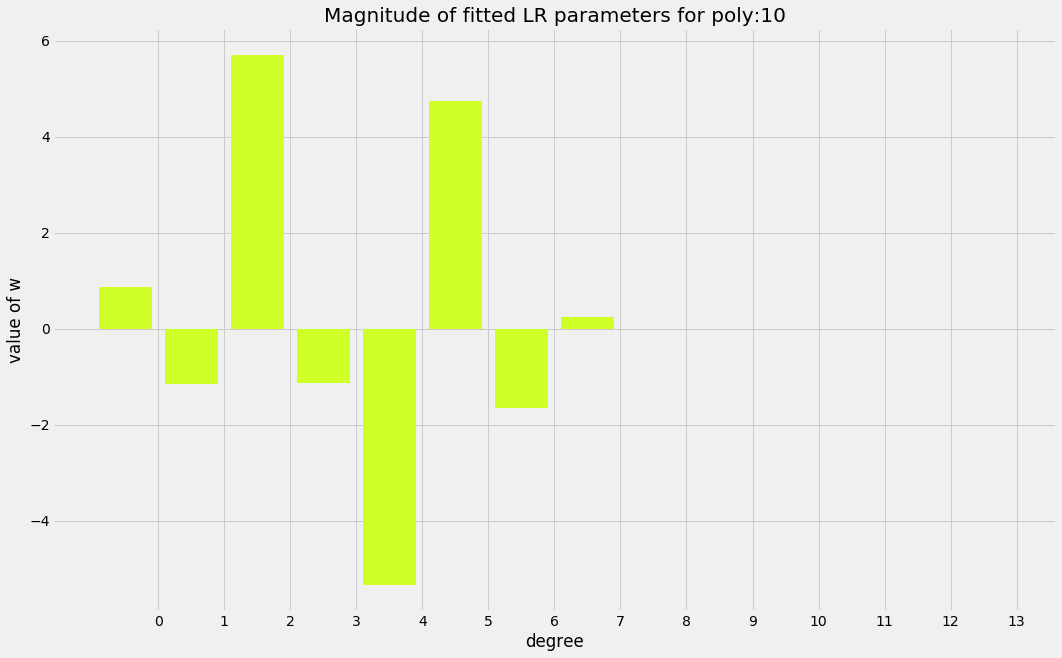

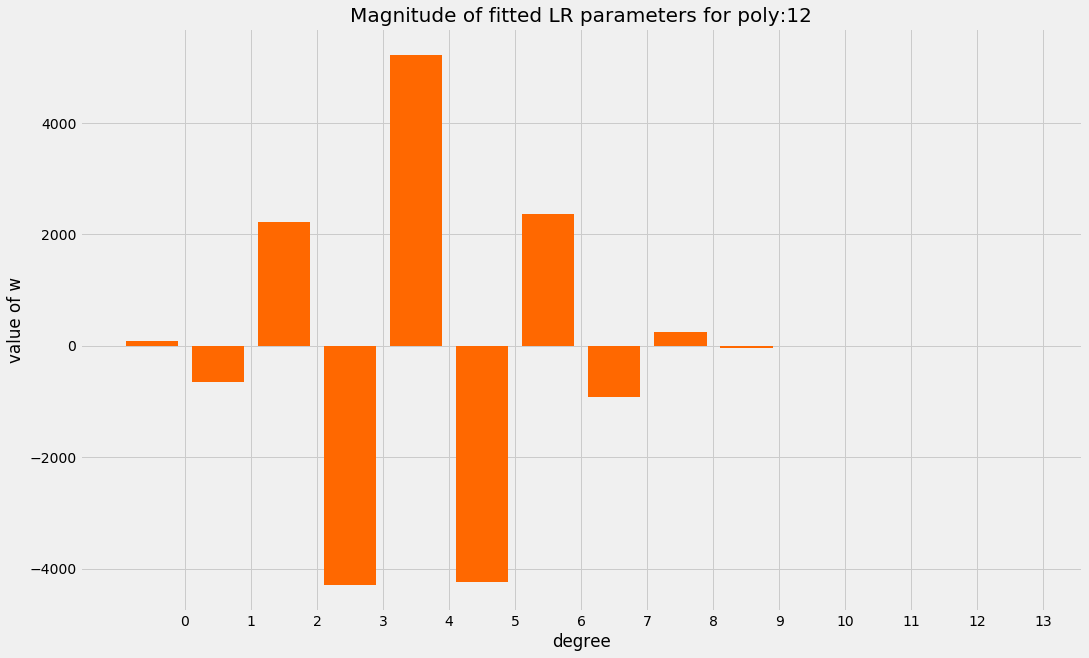

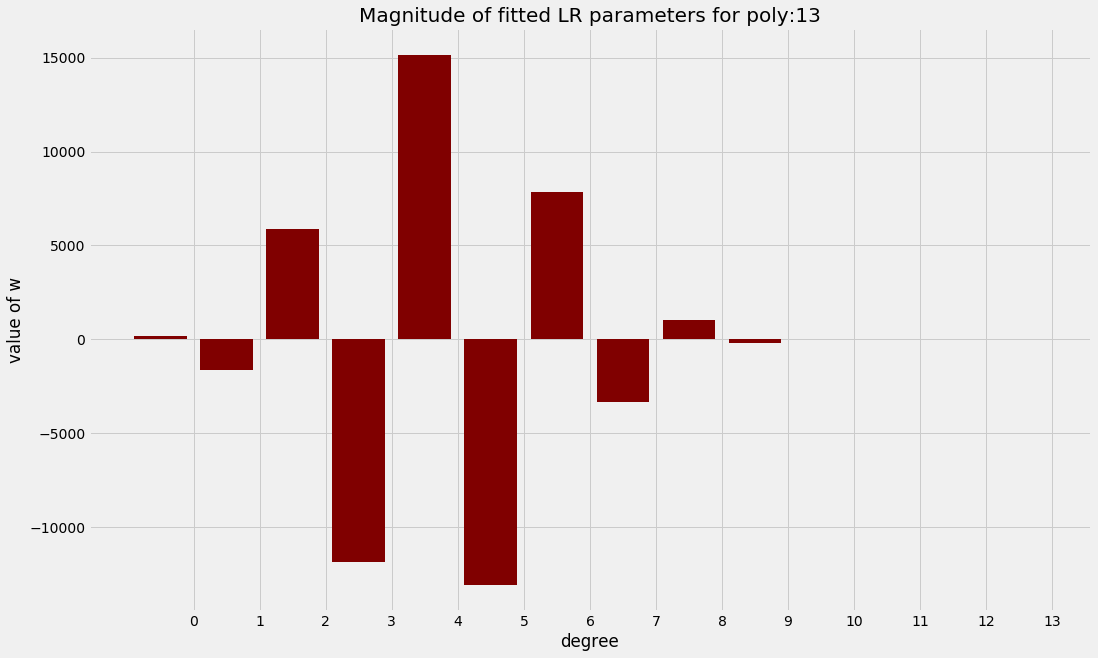

In [19]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Регуляризация

Симптомы переобучения видны невооруженным взглядом: выученная функция интерполирует данные (старается пройти чуть ли не через каждую точку данных). Так же мы видим, что абсолютные значения весов растут вместе с увеличением степени полинома. Что если мы наложим какой-нибудь штраф на амплитуду весов? В общем случае штраф выглядит следующим образом:
$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
где:
* $\large \lambda$ - это параметр регуляризации.

# $L_2$ регуляризация

Попробуем добавить ограничение на $L_2$ норму вектора параметров модели:

$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$

тогда целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$

Как и раньше, продифференцируем по параметрам $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$

и найдем решение:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

Такая регрессия называется гребневой регрессией (ridge regression). При увеличении параметра регуляризации, матрица $X^T X + \lambda E$ становится "менее сингулярной", т.е. **регулярной**, а задача становится более определенной. Для такой матрицы число обусловленности будет равно: $\dfrac{e_\text{max}+λ}{e_\text{min}+λ}$, где $e_x$ — это собственные числа матрицы. Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности.

![ridge](https://github.com/mephistopheies/mlworkshop39_042017/raw/a6426fd652faa38864c3ea4538e000539106fb56/1_ml_intro/ipy/images/l2reg.png)

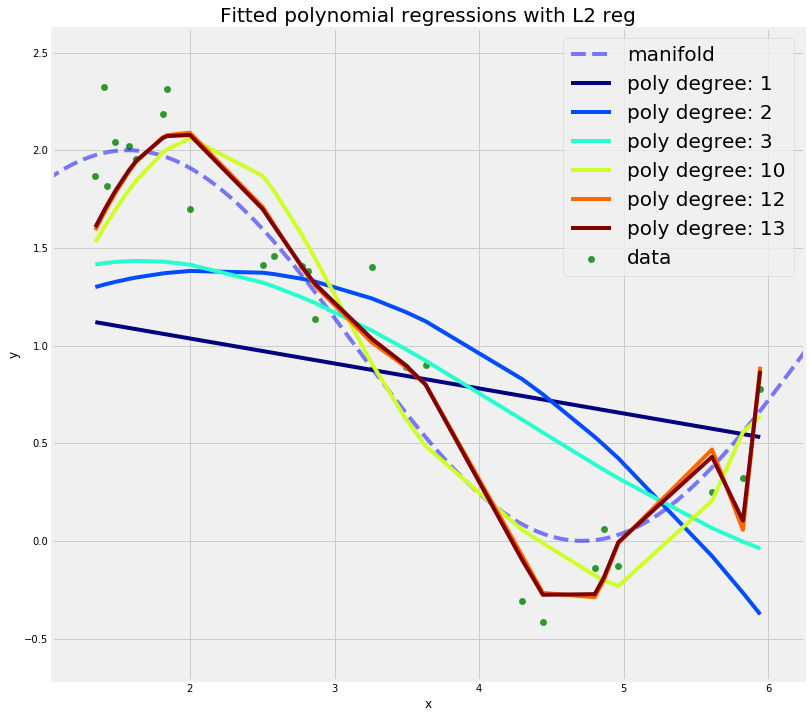

In [27]:
# define regularization parameter
lmbd = 5
plt.figure(figsize=(12,12))

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [28]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.5520735982984146
2 0.4075949397845424
3 0.2802186384343707
10 0.10030320151513869
12 0.05725511969656938
13 0.05222967763771286


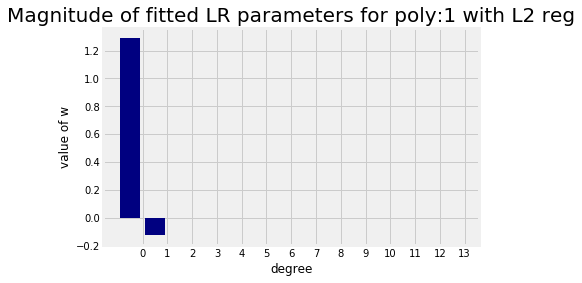

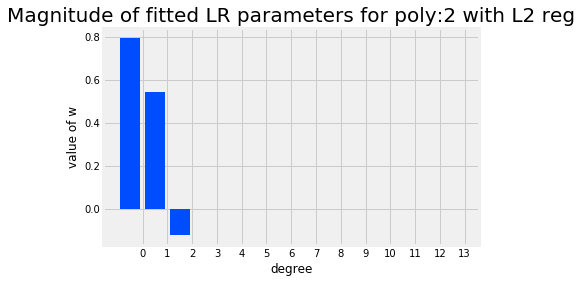

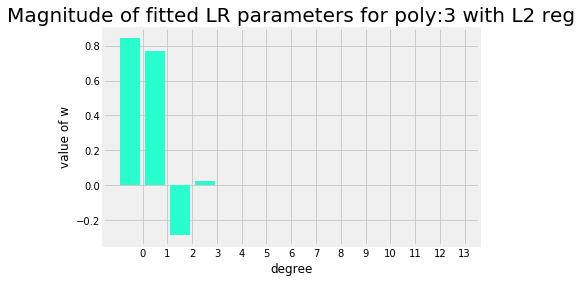

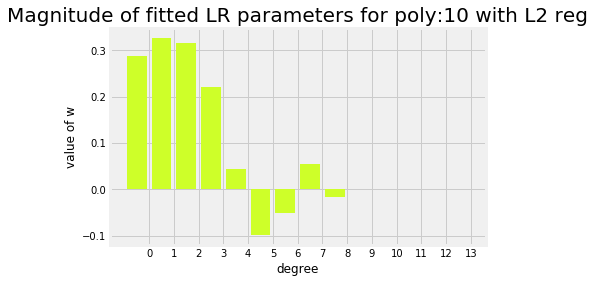

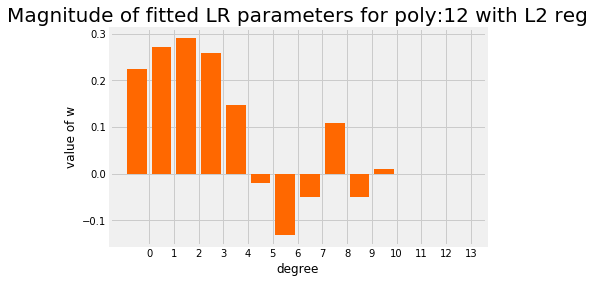

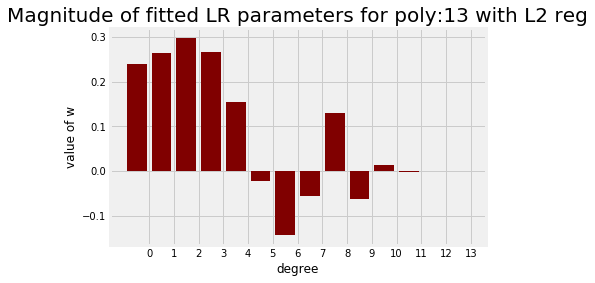

In [29]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# $L_1$ регуляризация
<center>или LASSO (least absolute shrinkage and selection operator)</center>

Добавим ограничение на $L_1$ норму вектора параметров:

$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$

целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

К сожалению, задача в этом виде не имеет общего аналитического решения, но мы можем воспользоваться методом градиентного спуска для поиска оптимального значения параметров модели:

$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$

Формула для итеративного обновления весов:
$$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ - это скорость обучения или размер градиентного шага.

In [30]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# w = np.random.normal(size=X.shape[1])

# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.00000001
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print(loss[-1])

1.4424679502523997e+41
1.4627689855399007e+63
1.4833557339579468e+85
1.504232216581884e+107
1.5254025110789747e+129
1.5468707525048403e+151
1.5686411341111315e+173
1.590717908164572e+195
1.6131053867775248e+217
1.6358079427502492e+239
1.6588300104250108e+261
1.6821760865522134e+283
1.7058507311687187e+305
inf
inf
inf
inf
inf
inf
inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


# Стандардизация

Что бы избезать расхождения алгоритма градиентного спуска и выровнять амплитуду признаков мы можем привести все признаки к единому стандарту: что бы среднее значение признаков было равно нулю, а дисперсия единице. Для этого необлодимо из каждого признака вычесть свое среднее (по столбцу) и разрелить на стандартное отклонение. Параметры преобразования мы вычисляем на тренировочном наборе:

$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$

а применяем как к тренировочному, так и к тестовому:

$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

In [24]:
# import norm class from scipy
from scipy.stats import norm

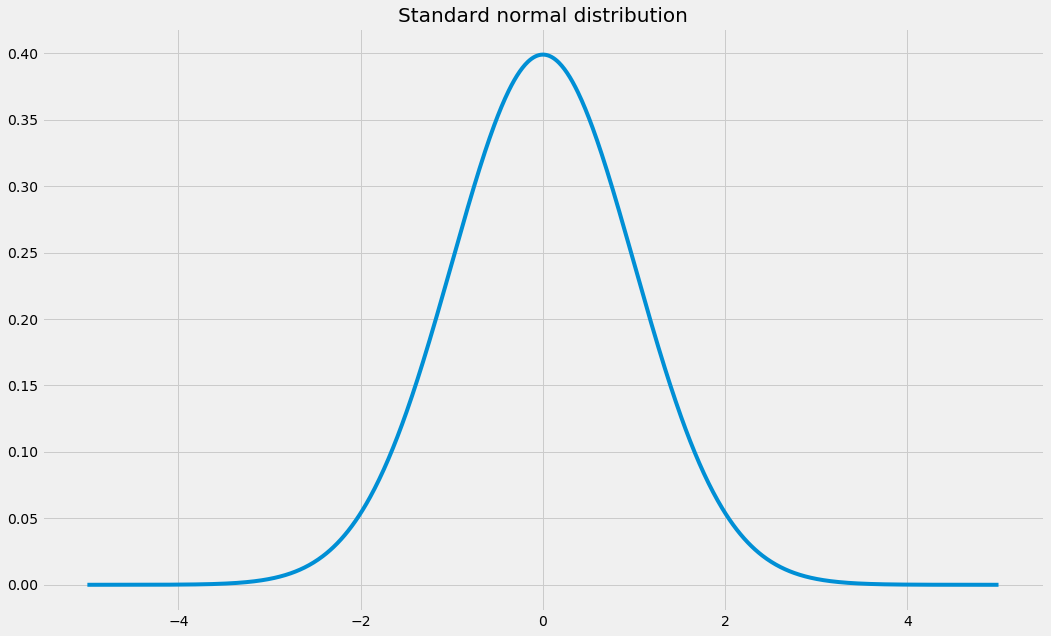

In [25]:
plt.plot(np.linspace(-5, 5, 1000), norm.pdf(np.linspace(-5, 5, 1000)))
plt.title('Standard normal distribution', fontsize=20)
plt.show()

X mean:
[1.00000000e+00 2.61717625e+00 8.89178866e+00 3.46858633e+01
 1.47337824e+02 6.62964718e+02 3.10664370e+03 1.49946179e+04
 7.40097896e+04 3.71757450e+05 1.89408958e+06 9.76488362e+06
 5.08473839e+07 2.67042329e+08]
X std
[0.00000000e+00 1.42904764e+00 8.26280332e+00 4.36295151e+01
 2.28694895e+02 1.20605446e+03 6.41842261e+03 3.44672461e+04
 1.86543640e+05 1.01602565e+06 5.56120143e+06 3.05530627e+07
 1.68325268e+08 9.29250585e+08]


/Users/jenya/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


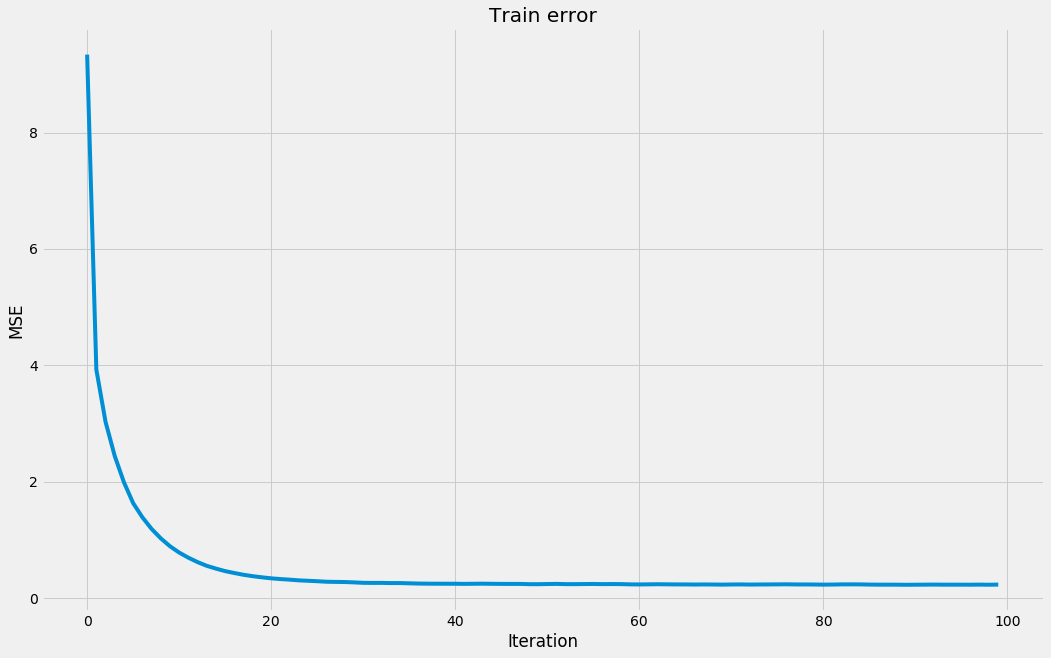

In [26]:
lmbd = 0.1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T
# compute sample mean
x_mean = X.mean(axis=0)
print('X mean:')
print(x_mean)
# compute sample std
x_std = X.std(axis=0)
print('X std')
print(x_std)
# apply transformation
X = (X - x_mean)/x_std
# fix first column with ones
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

Причешем код $L_1$ регрессии:

/Users/jenya/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide


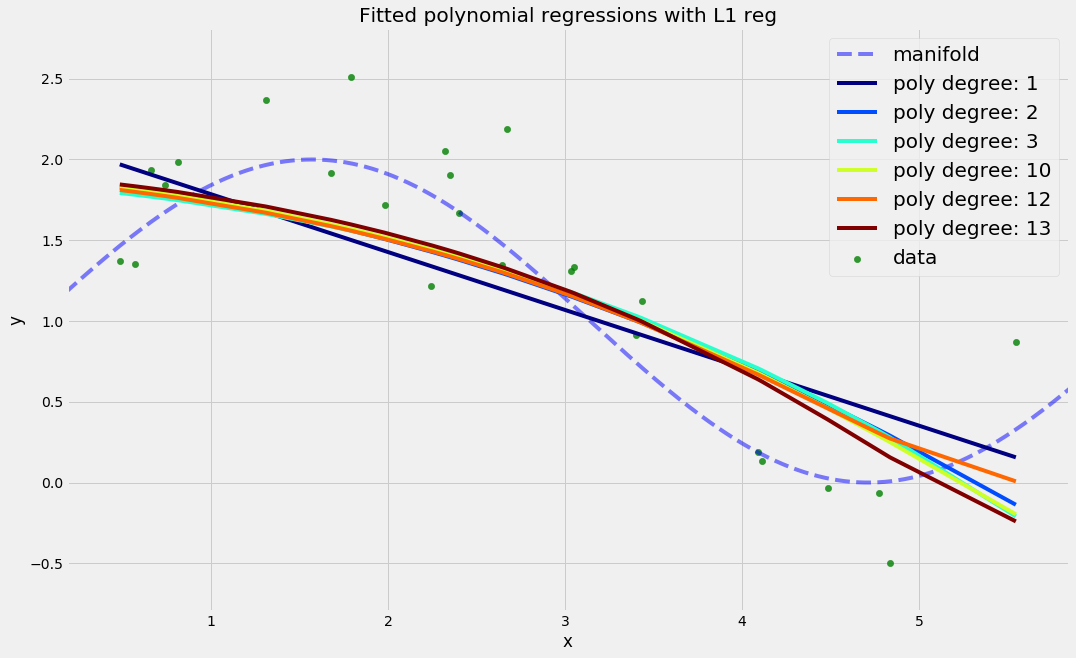

In [27]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=lmbd)
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [28]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.28705186765944957
2 0.25307833866849394
3 0.25620626832264193
10 0.24850696049574839
12 0.23705484170574334
13 0.2312897351438345


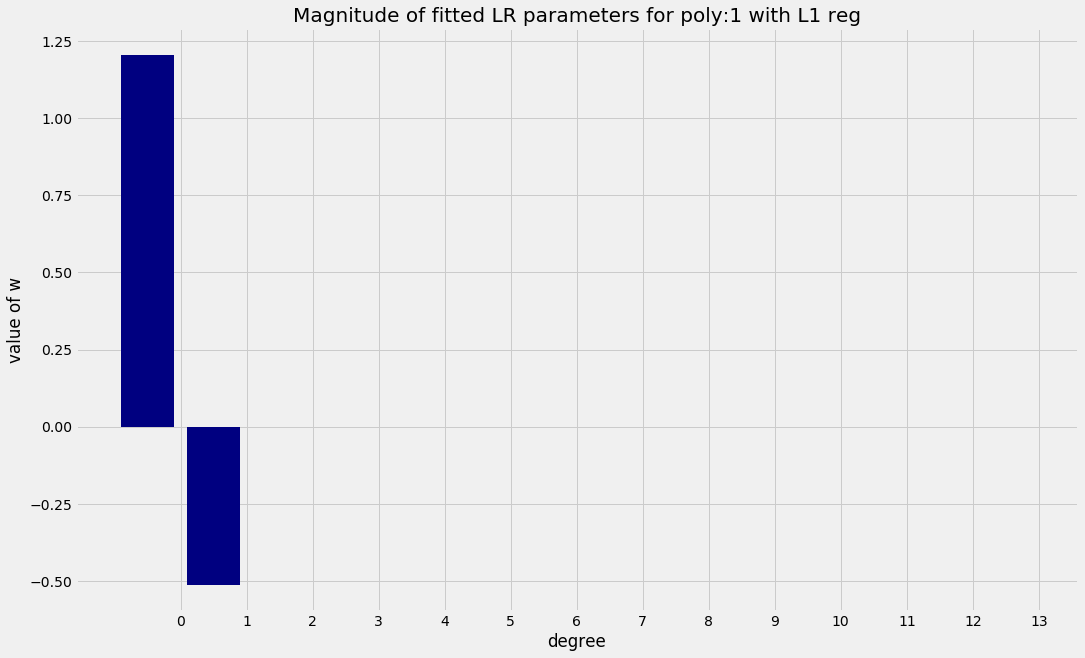

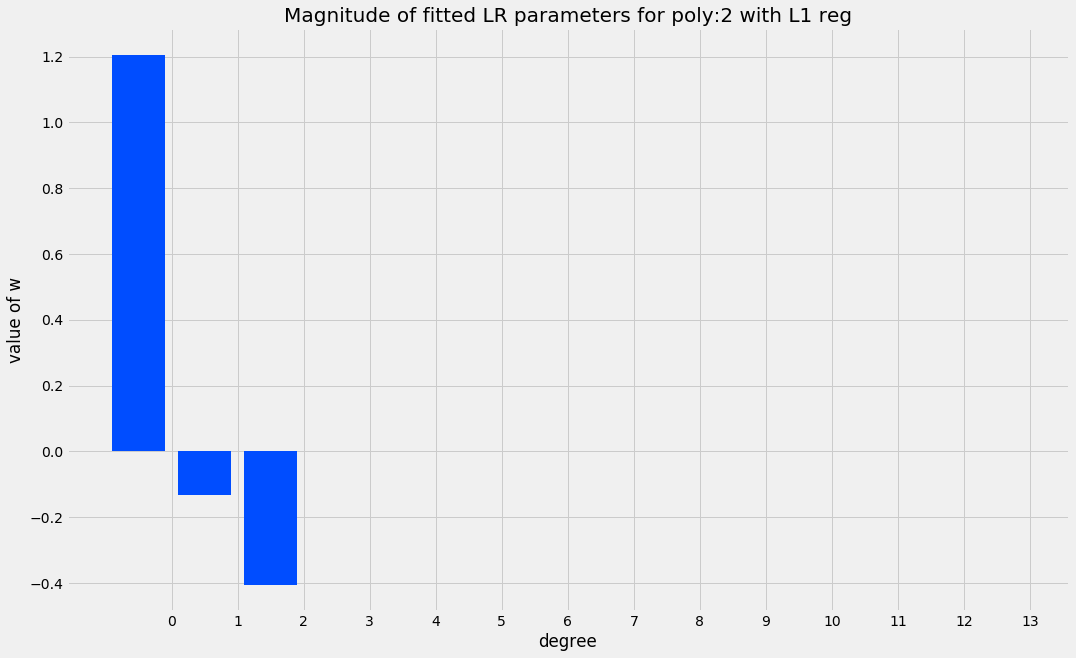

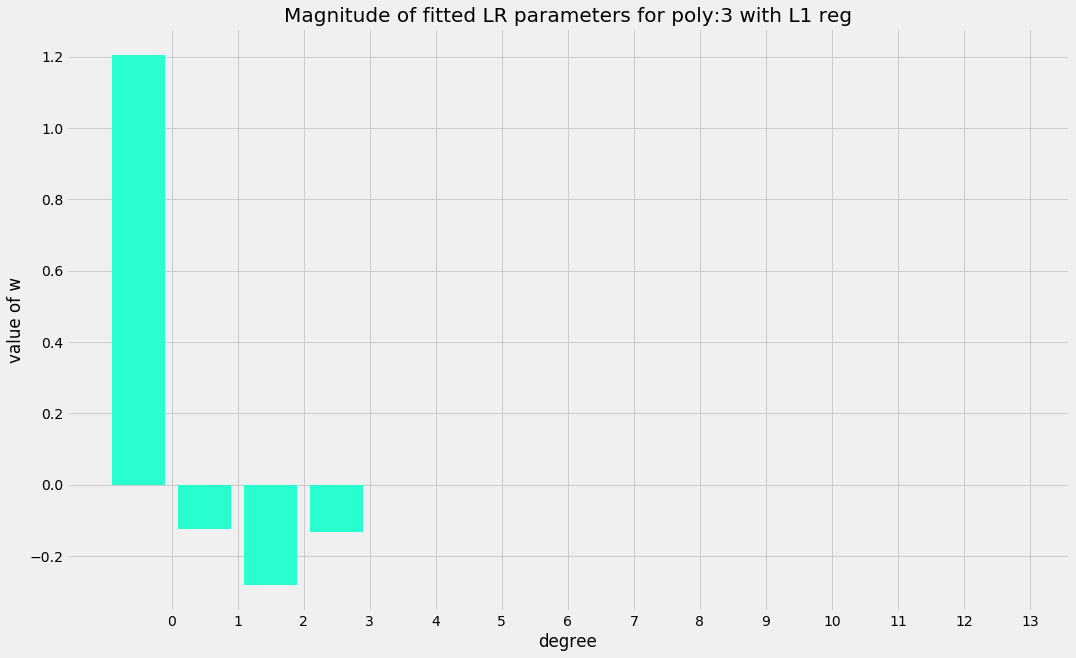

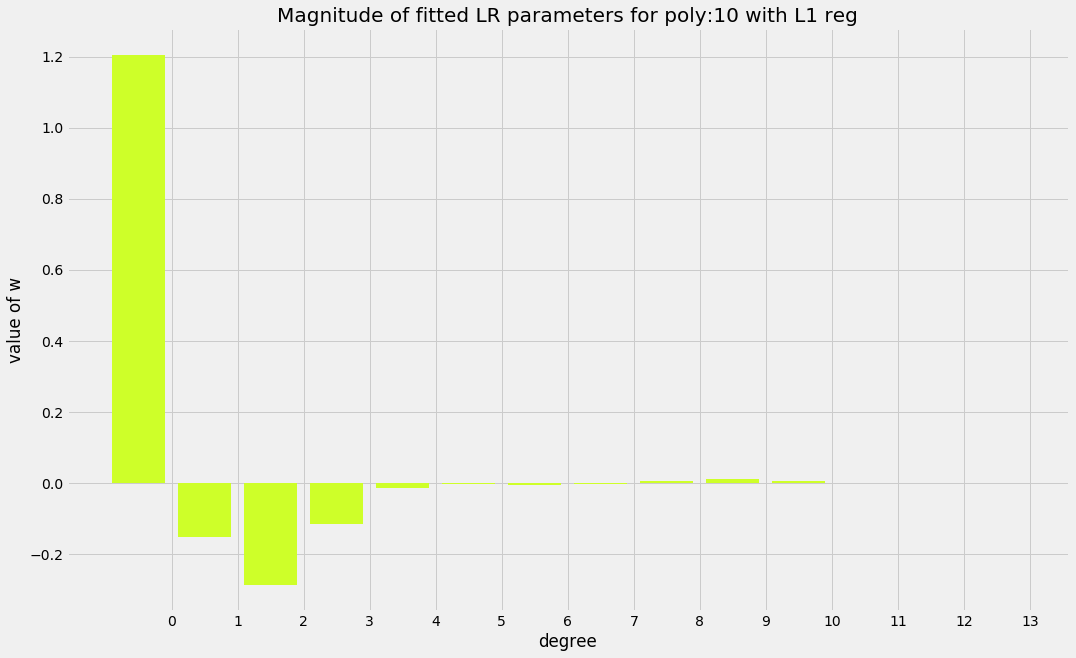

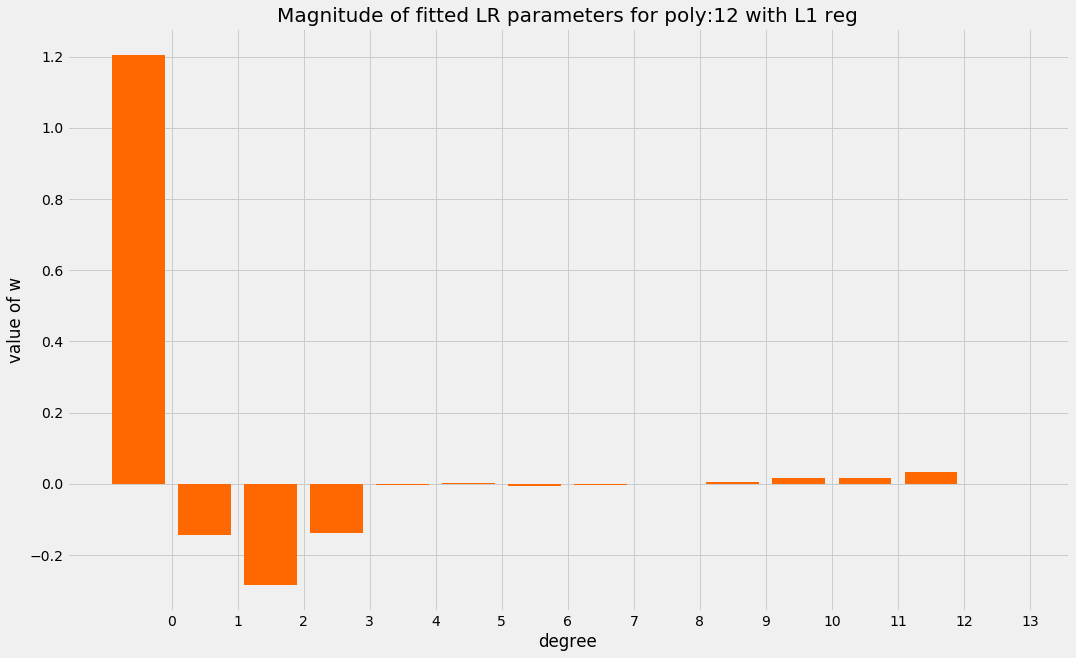

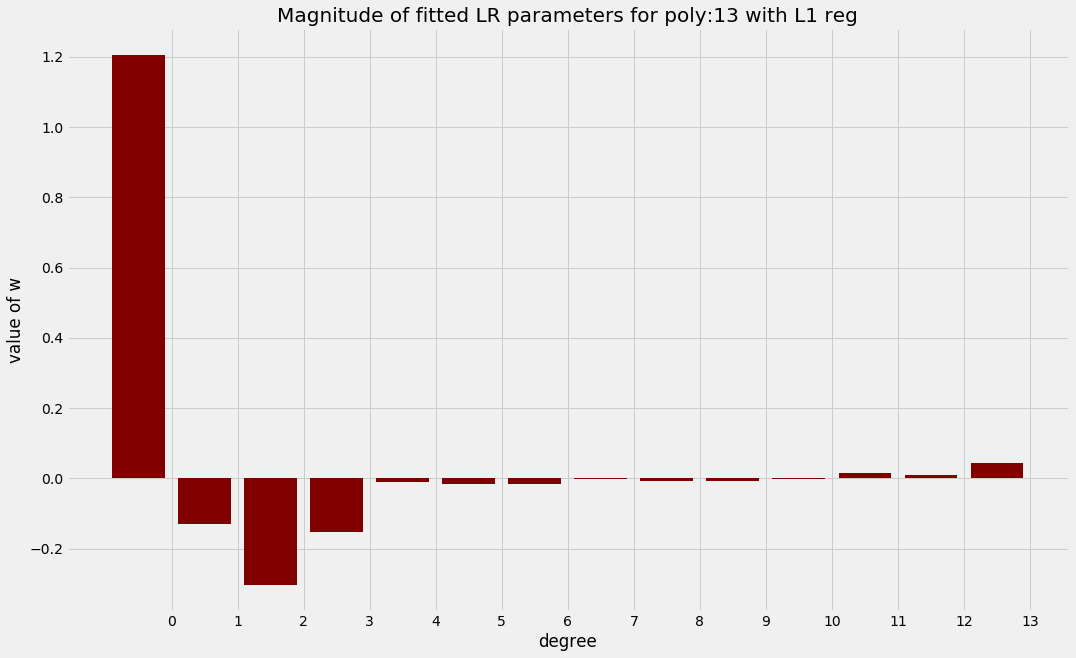

In [29]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L1 reg' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Логистическая регрессия

Рассмотрим задачу классификации на два класса. Используя теорему Байеса мы можем записать вероятность класса при заданных признаках (для простоты допустим признак всего один):

$$\large \begin{array}{rcl} p\left(c = 0 \mid x \right) &=& \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)}{p\left(x \mid c = 0\right) p\left(c = 0\right) + p\left(x \mid c = 1\right) p\left(c = 1\right)} \\
&=& \frac{1}{1 + e^{-a}} = \sigma\left(a\right)
\end{array}$$

где:
$$\large a = \ln \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)}{p\left(x \mid c = 1\right) p\left(c = 1\right)}$$
$\large a$ называется отношением вероятностей.

Допустим, что признаки внутри классов распределены нормально со своим средним и дисперсией:
$$\large p\left( x \mid c = k \right) \sim \mathcal{N}\left( \mu_k, \sigma \right)$$

а так же, для начала, допустим, что классы равновероятны:
$$\large \begin{array}{rcl} a &=& \ln \frac{p\left(x \mid c = 0\right)}{p\left(x \mid c = 1\right)} \\
&=& \ln p\left(x \mid c = 0\right) - \ln p\left(x \mid c = 1\right)\\
&=& \frac{1}{2\sigma^2} \left(\mu_1 - x\right)^2 -\frac{1}{2\sigma^2} \left(\mu_0 - x\right)^2 \\
&=& \frac{1}{2\sigma^2} \left(\left(\mu_1 - x\right)^2 - \left(\mu_0 - x\right)^2\right) \\
&=& \frac{1}{2\sigma^2} \left(\mu_1^2 - 2\mu_1 x + x^2 - \mu_0^2 + 2 \mu_0 x - x^2\right) \\
&=& \frac{\mu_1^2 - \mu_0^2}{2\sigma^2} + \frac{\mu_0 - 2\mu_1}{\sigma^2}x \\
&=& w_0 + w_1 x\\
\end{array}$$

Получается, что функция логистического сигмоида от линейной комбинации признаков и параметров естественно всплывает при предположении о нормальности признаков внутри класса.

*Логистическая регрессия* - это модель, где параметры линейной функции $\large \vec{w}$ оптимизируются напрямую.

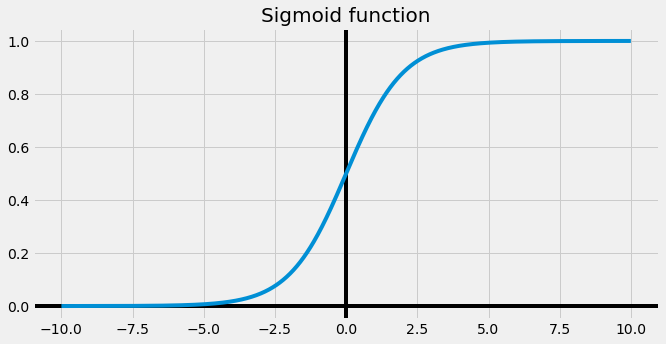

In [30]:
# define scalar function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# make vectorized function from scalar
sigmoid = np.vectorize(sigmoid)

x = np.linspace(-10, 10, 1000)

plt.rcParams['figure.figsize'] = 10, 5
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
plt.plot(x, sigmoid(x))
plt.title('Sigmoid function', fontsize=20)
plt.show()

Интересной особеностью сигмоида является то, что его производная выражается через значение самого себя:

$$\large \frac{\partial \sigma\left(x\right)}{\partial x} = \sigma\left(x\right) \left(1 - \sigma\left(x\right)\right)$$

Вспомним распределение Бернулли - это распределение случайной величины, которая принимает значение $1$ с вероятностью $\large p$, и значение $0$ с вероятностью $\large q = 1 - p$:
$$\large p\left(k \mid p\right) = p^k \left(1 - p\right)^{1 - k}$$

Короткий пример: монетку подкинули $\large n + m$ раз, $\large n$ раз выпал орел и $\large m$ раз решка. Найдем оценку максимального правдоподобия вероятности выпадения орла $\large p(\text{head}) = p$

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln p^n \left(1 - p\right)^m \\
\frac{\partial \mathcal{L}}{\partial p} &=& \frac{n}{p} - \frac{m}{1 - p} \\
\frac{\partial \mathcal{L}}{\partial p} = 0 &\Leftrightarrow& \frac{n}{p} = \frac{m}{1 - p} \\
&\Leftrightarrow& p = \frac{n}{n + m}
\end{array}$$

Сделаем тоже самое для набора данных $\large D = \left\{\left(\vec{x}_i, y_i\right)\right\}_{i=1,\ldots,n}$, $\large \forall i, y_i \in \left\{0, 1\right\}$, тогда правдоподобие набора:

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln \prod_{i=1}^n p\left(c = 0 \mid \vec{x}_i \right)^{y_i} \left(1 - p\left(c = 0 \mid \vec{x}_i \right)\right)^{1 - y_i} \\
&=& \ln \prod_{i=1}^n \sigma\left(\vec{w}^T \vec{x}_i\right)^{y_i} \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)^{1 - y_i} \\
&=& \sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)
\end{array}$$

Найдем формулу обновления весов логистической регрессии для градиентного спуска:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}}\sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right) \\
&=& \sum_{i=1}^n y_i \frac{1}{\sigma} \sigma \left(1 - \sigma\right) \vec{x}_i + \left(1 - y_i\right) \frac{1}{1 - \sigma} \left(-1\right)\sigma \left(1 - \sigma\right) \vec{x}_i \\
&=& \sum_{i=1}^n y_i \left(1 - \sigma\right) \vec{x}_i - \left(1 - y_i\right) \sigma \vec{x}_i \\
&=& \sum_{i=1}^n \vec{x}_i \left(y_i - \sigma\right)
\end{array}$$

In [31]:
import sklearn.datasets

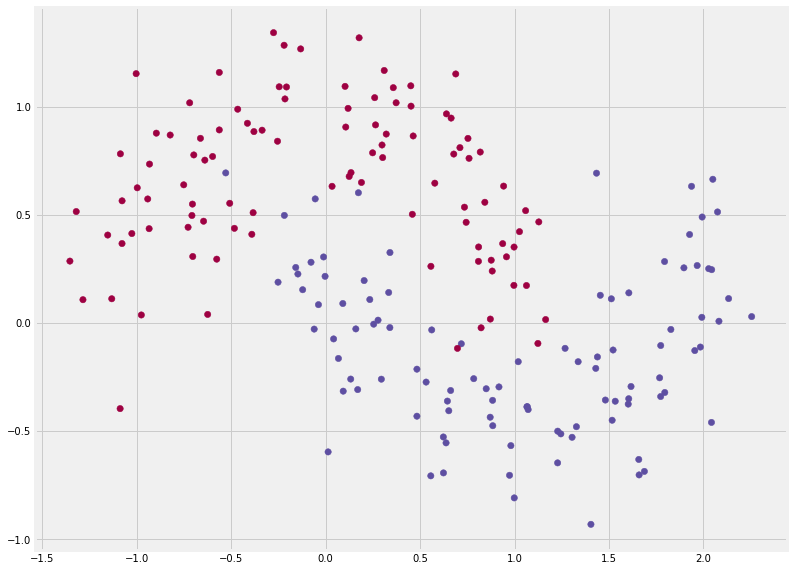

In [32]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.rcParams['figure.figsize'] = 12, 10
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [33]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

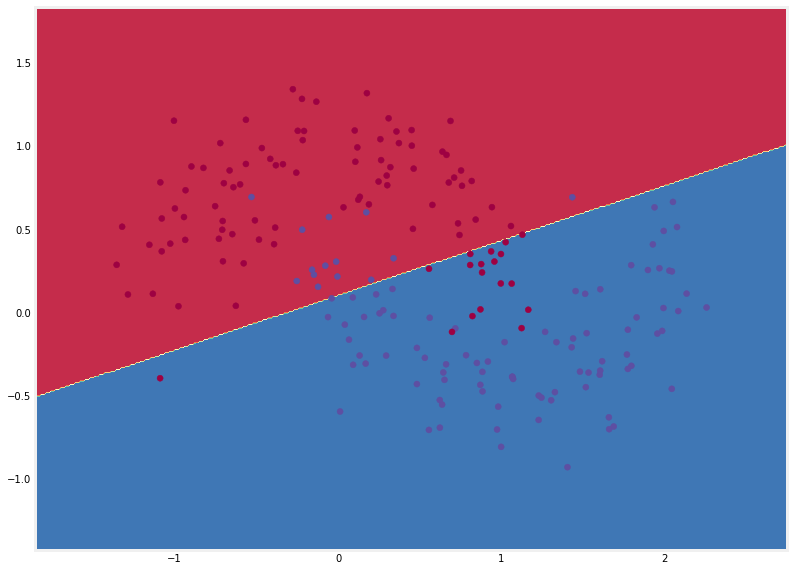

In [37]:
plot_decision_boundary(lr.predict)

### Классификация текста

Попробуем предсказать "токсичность" текста из соревнования Kaggle [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Данные можно скачать тут - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [38]:
import pandas as pd

In [40]:
train = pd.read_csv('train.csv')

In [41]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

![tf-idf](https://habrastorage.org/files/a0a/bb1/2e9/a0abb12e9ed94624ade0b9090d26ad66.png)

In [50]:
word_vectorizer = CountVectorizer(max_features=20000)

In [51]:
train_word_features = word_vectorizer.fit_transform(train['comment_text'])

In [52]:
train_word_features.shape

(159571, 20000)

In [53]:
test_size = 1000
target = 'toxic'

x_train = train_word_features[:-test_size]
x_test = train_word_features[-test_size:]
y_train = train[target][:-test_size]
y_test = train[target][-test_size:]

In [54]:
x_train.shape, x_test.shape

((158571, 20000), (1000, 20000))

In [55]:
y_train.value_counts(normalize=True)

0    0.904056
1    0.095944
Name: toxic, dtype: float64

In [56]:
y_test.value_counts(normalize=True)

0    0.92
1    0.08
Name: toxic, dtype: float64

In [57]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
preds = lr.predict(x_test)

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_test, preds)

0.7410326086956522

### Анализ модели

In [61]:
test_text = """
    hi,idiot, why are you delate my talking, just come out say 
"""

In [62]:
lr.predict(word_vectorizer.transform([test_text]))

array([1], dtype=int64)

In [63]:
lr.predict_proba(word_vectorizer.transform([test_text]))

array([[0.32202195, 0.67797805]])

In [65]:
import eli5

In [66]:
eli5.explain_weights(lr, feature_names=word_vectorizer.get_feature_names())

Weight?,Feature
+3.875,fuck
+3.193,fucking
+2.505,shit
+2.455,idiot
+2.444,stupid
+2.229,suck
+2.201,ass
+1.833,asshole
+1.709,bitch
+1.703,dick


In [67]:
from sklearn.pipeline import Pipeline

In [68]:
eli5.explain_prediction(lr, test_text, vec=word_vectorizer, feature_names=word_vectorizer.get_feature_names())

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='idiot', weight=2.4554132861382088, std=None, value=1.0), FeatureWeight(feature='you', weight=0.32132256092461003, std=None, value=1.0), FeatureWeight(feature='are', weight=0.18915360331569617, std=None, value=1.0), FeatureWeight(feature='my', weight=0.18730335179282098, std=None, value=1.0), FeatureWeight(feature='come', weight=0.15662653022051254, std=None, value=1.0), FeatureWeight(feature='out', weight=0.09407654098832234, std=None, value=1.0), FeatureWeight(feature='talking', weight=0.016407250080294235, std=None, value=1.0)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.1338318307995263, std=None, value=1.0), FeatureWeight(feature='hi', weight=-0.3521532948573388, std=None, value=1.0), FeatureWeight(feature='why', weight=-0.08099788331868962, std=None, value=1.0), FeatureWeight(feature='just', weight=-0.05947847555874189, std=None, value=1.0), FeatureWeight(feature='say', weight=-0.04934644952722269, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.677978047278997, score=0.7444951893989455, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document='\n    hi,idiot, why are you delate my talking, just come out say \n', spans=[('hi', [(5, 7)], -0.3521532948573388), ('idiot', [(8, 13)], 2.4554132861382088), ('why', [(15, 18)], -0.08099788331868962), ('are', [(19, 22)], 0.18915360331569617), ('you', [(23, 26)], 0.32132256092461003), ('my', [(34, 36)], 0.18730335179282098), ('talking', [(37, 44)], 0.016407250080294235), ('just', [(46, 50)], -0.05947847555874189), ('come', [(51, 55)], 0.15662653022051254), ('out', [(56, 59)], 0.09407654098832234), ('say', [(60, 63)], -0.04934644952722269)], preserve_density=False, vec_name=None)], other=FeatureWeights(pos=[FeatureWeight(feature=<FormattedFeatureName 'Highlighted in text (sum)'>, weight=2.878327020198472, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.1338318307995263, std=None, value=1.0)], pos_remaining=0, neg_remaining=0)))], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None)